In [53]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import re
import seaborn as sns

In [54]:
wthr = pd.read_csv('../data/weather_updated.csv')

In [55]:
crps = pd.read_csv('../data/regions_eda.csv')

C:\Users\Aaron\AppData\Local\Temp\ipykernel_25272\467395438.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  crps = pd.read_csv('../data/regions_eda.csv')


In [56]:
crps = crps[crps['statisticcat_desc'] == 'YIELD']

In [57]:
wthr = wthr.groupby(['region','Year'])['prcp'].sum()

In [58]:
wthr

region         Year
NORTH CENTRAL  2002    1284.16
               2007    1531.47
               2012    1096.49
               2017    1498.93
NORTH EASTERN  2002    1597.06
               2007    1685.92
               2012    1575.19
               2017    1856.67
NORTH WEST     2002     389.03
               2007     389.95
               2012     528.03
               2017     524.69
SOUTH CENTRAL  2002    1050.56
               2007    1069.59
               2012     899.54
               2017    1060.99
SOUTH EASTERN  2002    1631.66
               2007    1229.69
               2012    1512.45
               2017    1720.80
SOUTH WEST     2002     323.59
               2007     323.73
               2012     398.54
               2017     468.98
Name: prcp, dtype: float64

In [59]:
crps = crps[crps['year'] != 2018]
crps

,Unnamed: 0,class_desc,group_desc,prodn_practice_desc,state_name,year,short_desc,sector_desc,domaincat_desc,cv (%),...,country_code,util_practice_desc,statisticcat_desc,unit_desc,agg_level_desc,domain_desc,value,reference_period_desc,region,value_lbs_acre
15,15,ALL CLASSES,FIELD CROPS,"IRRIGATED, NONE OF CROP",ALABAMA,2017,"BARLEY, IRRIGATED, NONE OF CROP - YIELD, MEASU...",CROPS,NOT SPECIFIED,12.9,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,47.0,YEAR,SOUTH EASTERN,2632.0
39,39,ALL CLASSES,FIELD CROPS,"IRRIGATED, ENTIRE CROP",ALABAMA,2017,"CORN, GRAIN, IRRIGATED, ENTIRE CROP - YIELD, M...",CROPS,NOT SPECIFIED,5.6,...,9000,GRAIN,YIELD,BU / ACRE,STATE,TOTAL,183.1,YEAR,SOUTH EASTERN,10253.6
42,42,ALL CLASSES,FIELD CROPS,"IRRIGATED, ENTIRE CROP",ALABAMA,2017,"CORN, SILAGE, IRRIGATED, ENTIRE CROP - YIELD, ...",CROPS,NOT SPECIFIED,22,...,9000,SILAGE,YIELD,TONS / ACRE,STATE,TOTAL,16.2,YEAR,SOUTH EASTERN,16200.0
45,45,ALL CLASSES,FIELD CROPS,"IRRIGATED, NONE OF CROP",ALABAMA,2017,"CORN, GRAIN, IRRIGATED, NONE OF CROP - YIELD, ...",CROPS,NOT SPECIFIED,3.4,...,9000,GRAIN,YIELD,BU / ACRE,STATE,TOTAL,150.9,YEAR,SOUTH EASTERN,8450.4
48,48,ALL CLASSES,FIELD CROPS,"IRRIGATED, NONE OF CROP",ALABAMA,2017,"CORN, SILAGE, IRRIGATED, NONE OF CROP - YIELD,...",CROPS,NOT SPECIFIED,2.9,...,9000,SILAGE,YIELD,TONS / ACRE,STATE,TOTAL,13.8,YEAR,SOUTH EASTERN,13800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455595,455595,"SPRING, (EXCL DURUM)",FIELD CROPS,"IRRIGATED, NONE OF CROP",WYOMING,2002,"WHEAT, SPRING, (EXCL DURUM), IRRIGATED, NONE O...",CROPS,NOT SPECIFIED,NaN,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,NaN,YEAR,NORTH WEST,NaN
455603,455603,WINTER,FIELD CROPS,"IRRIGATED, ENTIRE CROP",WYOMING,2002,"WHEAT, WINTER, IRRIGATED, ENTIRE CROP - YIELD,...",CROPS,NOT SPECIFIED,NaN,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,55.6,YEAR,NORTH WEST,3113.6
455606,455606,WINTER,FIELD CROPS,"IRRIGATED, NONE OF CROP",WYOMING,2002,"WHEAT, WINTER, IRRIGATED, NONE OF CROP - YIELD...",CROPS,NOT SPECIFIED,NaN,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,14.4,YEAR,NORTH WEST,806.4
455608,455608,WINTER,FIELD CROPS,"IRRIGATED, PART OF CROP",WYOMING,2002,"WHEAT, WINTER, IRRIGATED, PART OF CROP - YIELD...",CROPS,NOT SPECIFIED,NaN,...,9000,ALL UTILIZATION PRACTICES,YIELD,BU / ACRE,STATE,TOTAL,28.8,YEAR,NORTH WEST,1612.8


In [60]:
crps = crps.groupby(['region', 'year'])['value'].sum()

In [61]:

crps = pd.DataFrame(crps)

In [62]:
crps = crps.reset_index(level=['region', 'year'])
crps

,region,year,value
0,NORTH CENTRAL,2002,14248.2
1,NORTH CENTRAL,2007,13988.4
2,NORTH CENTRAL,2012,13011.0
3,NORTH CENTRAL,2017,15179.1
4,NORTH EASTERN,2002,14404.9
5,NORTH EASTERN,2007,10174.7
6,NORTH EASTERN,2012,12598.0
7,NORTH EASTERN,2017,13364.3
8,NORTH WEST,2002,7498.4
9,NORTH WEST,2007,6268.2


In [63]:
wthr = pd.DataFrame(wthr)

In [64]:
wthr = wthr.reset_index(level=['region', 'Year'])

In [65]:
print(len(wthr))
print(len(crps))

24
24


In [66]:
newdf = crps.merge(wthr, how='right',left_on= ['region', 'year'], right_on=['region', 'Year'])

In [67]:
newdf

,region,year,value,Year,prcp
0,NORTH CENTRAL,2002,14248.2,2002,1284.16
1,NORTH CENTRAL,2007,13988.4,2007,1531.47
2,NORTH CENTRAL,2012,13011.0,2012,1096.49
3,NORTH CENTRAL,2017,15179.1,2017,1498.93
4,NORTH EASTERN,2002,14404.9,2002,1597.06
5,NORTH EASTERN,2007,10174.7,2007,1685.92
6,NORTH EASTERN,2012,12598.0,2012,1575.19
7,NORTH EASTERN,2017,13364.3,2017,1856.67
8,NORTH WEST,2002,7498.4,2002,389.03
9,NORTH WEST,2007,6268.2,2007,389.95


In [68]:
newdf.to_csv('corr.csv', index = True)
print('\nCSV String:\n', 'corr_csv')


CSV String:
 corr_csv


In [69]:
newdf

,region,year,value,Year,prcp
0,NORTH CENTRAL,2002,14248.2,2002,1284.16
1,NORTH CENTRAL,2007,13988.4,2007,1531.47
2,NORTH CENTRAL,2012,13011.0,2012,1096.49
3,NORTH CENTRAL,2017,15179.1,2017,1498.93
4,NORTH EASTERN,2002,14404.9,2002,1597.06
5,NORTH EASTERN,2007,10174.7,2007,1685.92
6,NORTH EASTERN,2012,12598.0,2012,1575.19
7,NORTH EASTERN,2017,13364.3,2017,1856.67
8,NORTH WEST,2002,7498.4,2002,389.03
9,NORTH WEST,2007,6268.2,2007,389.95


[[1.         0.55384673]
 [0.55384673 1.        ]]


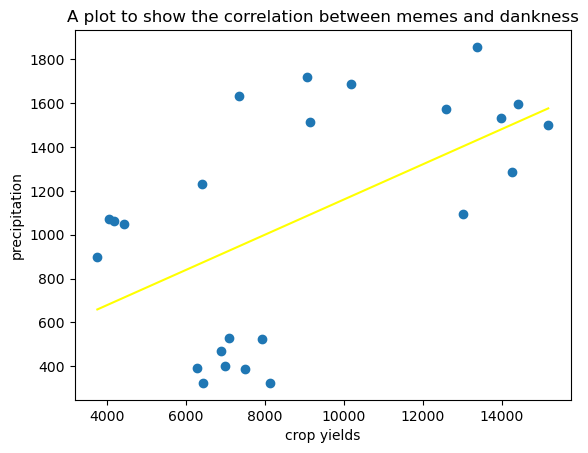

In [70]:
x = newdf['value']
y = newdf['prcp']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('A plot to show the correlation between memes and dankness')
plt.xlabel('crop yields')
plt.ylabel('precipitation')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

In [71]:
newdf.drop(['Year'], axis =1)

,region,year,value,prcp
0,NORTH CENTRAL,2002,14248.2,1284.16
1,NORTH CENTRAL,2007,13988.4,1531.47
2,NORTH CENTRAL,2012,13011.0,1096.49
3,NORTH CENTRAL,2017,15179.1,1498.93
4,NORTH EASTERN,2002,14404.9,1597.06
5,NORTH EASTERN,2007,10174.7,1685.92
6,NORTH EASTERN,2012,12598.0,1575.19
7,NORTH EASTERN,2017,13364.3,1856.67
8,NORTH WEST,2002,7498.4,389.03
9,NORTH WEST,2007,6268.2,389.95


In [72]:
tmp_wthr = pd.read_csv('../data/weather_updated.csv')

In [73]:
tmp_wthr = tmp_wthr.groupby(['region','Year'])['tmax'].median()
tmp_wthr

region         Year
NORTH CENTRAL  2002    59.0
               2007    65.0
               2012    67.0
               2017    65.0
NORTH EASTERN  2002    60.0
               2007    64.0
               2012    64.0
               2017    65.0
NORTH WEST     2002    59.0
               2007    60.0
               2012    61.0
               2017    59.0
SOUTH CENTRAL  2002    77.0
               2007    80.0
               2012    81.0
               2017    81.0
SOUTH EASTERN  2002    80.0
               2007    81.0
               2012    81.0
               2017    82.0
SOUTH WEST     2002    71.0
               2007    72.0
               2012    73.0
               2017    73.0
Name: tmax, dtype: float64

In [74]:
tmp_wthr = tmp_wthr.reset_index(level=['region', 'Year'])

In [75]:
tmp_wthr = pd.DataFrame(tmp_wthr)
tmp_wthr

,region,Year,tmax
0,NORTH CENTRAL,2002,59.0
1,NORTH CENTRAL,2007,65.0
2,NORTH CENTRAL,2012,67.0
3,NORTH CENTRAL,2017,65.0
4,NORTH EASTERN,2002,60.0
5,NORTH EASTERN,2007,64.0
6,NORTH EASTERN,2012,64.0
7,NORTH EASTERN,2017,65.0
8,NORTH WEST,2002,59.0
9,NORTH WEST,2007,60.0


In [76]:
newdf = newdf.merge(tmp_wthr, how='right',left_on= ['region', 'year'], right_on=['region', 'Year'])

In [77]:
newdf

,region,year,value,Year_x,prcp,Year_y,tmax
0,NORTH CENTRAL,2002,14248.2,2002,1284.16,2002,59.0
1,NORTH CENTRAL,2007,13988.4,2007,1531.47,2007,65.0
2,NORTH CENTRAL,2012,13011.0,2012,1096.49,2012,67.0
3,NORTH CENTRAL,2017,15179.1,2017,1498.93,2017,65.0
4,NORTH EASTERN,2002,14404.9,2002,1597.06,2002,60.0
5,NORTH EASTERN,2007,10174.7,2007,1685.92,2007,64.0
6,NORTH EASTERN,2012,12598.0,2012,1575.19,2012,64.0
7,NORTH EASTERN,2017,13364.3,2017,1856.67,2017,65.0
8,NORTH WEST,2002,7498.4,2002,389.03,2002,59.0
9,NORTH WEST,2007,6268.2,2007,389.95,2007,60.0


In [78]:
newdf.drop(['Year_x','Year_y'], axis =1)
newdf

,region,year,value,Year_x,prcp,Year_y,tmax
0,NORTH CENTRAL,2002,14248.2,2002,1284.16,2002,59.0
1,NORTH CENTRAL,2007,13988.4,2007,1531.47,2007,65.0
2,NORTH CENTRAL,2012,13011.0,2012,1096.49,2012,67.0
3,NORTH CENTRAL,2017,15179.1,2017,1498.93,2017,65.0
4,NORTH EASTERN,2002,14404.9,2002,1597.06,2002,60.0
5,NORTH EASTERN,2007,10174.7,2007,1685.92,2007,64.0
6,NORTH EASTERN,2012,12598.0,2012,1575.19,2012,64.0
7,NORTH EASTERN,2017,13364.3,2017,1856.67,2017,65.0
8,NORTH WEST,2002,7498.4,2002,389.03,2002,59.0
9,NORTH WEST,2007,6268.2,2007,389.95,2007,60.0


In [79]:
newdf.to_csv('corr.csv', index = True)
print('\nCSV String:\n', 'corr_csv')


CSV String:
 corr_csv
